In [1]:
#Extraction of the Ticker information ( Price: Open, Close, High, Low and volume)
import pandas as pd
import datetime
import os 
import sklearn as sk
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PowerTransformer

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 3, 16)
ticker = "AMZN"

stock_df = web.DataReader(ticker, 'yahoo', start, end)
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-10,3116.459961,3030.050049,3098.449951,3057.639893,3008700,3057.639893
2021-03-11,3131.780029,3082.929932,3104.010010,3113.590088,2770800,3113.590088
2021-03-12,3098.979980,3045.500000,3075.000000,3089.489990,2418500,3089.489990
2021-03-15,3082.239990,3032.090088,3074.570068,3081.679932,2913600,3081.679932
2021-03-16,3128.909912,3075.860107,3104.969971,3091.860107,2538764,3091.860107


In [2]:
import pandas_datareader.data as web

symbol = 'WIKI/GOOG'  # or 'AAPL.US'
#quandl.ApiConfig.api_key = 

df = web.DataReader(symbol, 'quandl', '2010-01-01', '2021-03-15',retry_count=3,api_key="eys9Qowq7xsT5zdCr6-m")

df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1063.00,1064.84,996.92,1005.10,3029471.0,0.0,1.0,1063.00,1064.84,996.92,1005.10,3029471.0
2018-03-26,1046.00,1055.63,1008.40,1053.21,2558385.0,0.0,1.0,1046.00,1055.63,1008.40,1053.21,2558385.0
2018-03-23,1047.03,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.03,1063.36,1021.22,1021.57,2113497.0
2018-03-22,1081.88,1082.90,1045.91,1049.08,2580374.0,0.0,1.0,1081.88,1082.90,1045.91,1049.08,2580374.0
2018-03-21,1092.74,1106.30,1085.15,1090.88,1640709.0,0.0,1.0,1092.74,1106.30,1085.15,1090.88,1640709.0


In [3]:
#Rolling Mean( Moving Average) and Rate of return

close_price = stock_df["Adj Close"]
moving_average = close_price.rolling(window =100).mean()
moving_average.tail()

Date
2021-03-10    3188.018481
2021-03-11    3185.767883
2021-03-12    3183.935684
2021-03-15    3182.680383
2021-03-16    3181.428884
Name: Adj Close, dtype: float64

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

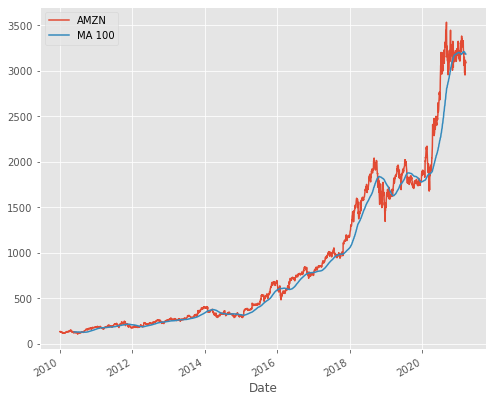

In [5]:
mpl.rc("figure", figsize= (8,7))

style.use("ggplot")


close_price.plot(label = ticker)
moving_average.plot(label = "MA 100")
plt.legend()

In [6]:
dfreg = stock_df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (stock_df["High"] - stock_df["Low"]) / stock_df["Close"] * 100.0
dfreg["PCT_change"] = (stock_df["Close"] - stock_df["Open"]) / stock_df["Open"] * 100.0

dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-03-10,3057.639893,3008700,2.826033,-1.317112
2021-03-11,3113.590088,2770800,1.568932,0.308636
2021-03-12,3089.489990,2418500,1.731029,0.471219
2021-03-15,3081.679932,2913600,1.627356,0.231247
2021-03-16,3091.860107,2538764,1.715789,-0.422222


In [7]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
import math
import numpy as np

In [8]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [9]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

In [10]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Scale the X so that everyone can have the same distribution for linear regression
X = sk.preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [13]:
# Linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [14]:
print(X_train)

[[-0.68839338 -0.37551466 -0.55485161  0.41067485]
 [-0.54018492 -0.58745627 -0.4598415   0.08310534]
 [-0.81789248  1.74480345  2.06692161 -2.55431426]
 ...
 [-0.65634487 -0.4968561   0.1047031   1.25344545]
 [-0.59515823 -0.49653137  0.49343422  1.34411742]
 [-0.73166753 -0.37464871  0.14250035  0.30768085]]


In [15]:
print(X)

[[-0.88558124  1.10021087  0.22538673 -1.10969438]
 [-0.88466886  1.55194886  0.32944023  0.58189537]
 [-0.88748682  0.94827248  0.02041042 -1.12309424]
 ...
 [ 2.6626218  -0.09563195 -0.52086555 -0.48357466]
 [ 2.82047363 -0.14087791  0.8932844   1.94822464]
 [ 2.86334369  0.91933527 -0.25923524 -0.0165865 ]]


In [16]:
len(X)

2790

In [17]:
len(X_train)

1953

In [18]:
len(X_test)

837

In [19]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [20]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)


In [21]:
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn )

0.98554703936806
0.9866562243647176
0.9856963948215303
0.970788245198842


In [22]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([3416.74926474, 3427.73673122, 3451.26157852, 3417.76938327,
       3395.86047192, 3381.9341152 , 3352.83070208, 3370.03108245,
       3362.8225129 , 3403.75565625, 3425.31200395, 3348.74815621,
       3271.70122411, 3300.0794442 , 3246.84104533, 3166.67707226,
       3188.97515868, 3236.00702969, 3191.60322651, 3109.2600833 ,
       3077.75083645, 3106.71907395, 3055.20842946, 3159.43335889,
       3156.41174758, 3201.68258521, 3179.62153541, 3169.13783382,
       3181.36784182])

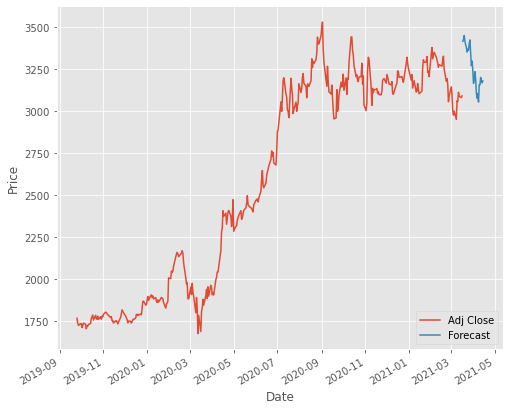

In [23]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
    
dfreg['Adj Close'].tail(400).plot()
dfreg['Forecast'].tail(400).plot()
plt.legend(loc=4)
#plt.rcParams["figure.figsize"]=50,50
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [24]:
dfreg.tail(60)

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2021-02-01,3342.879883,4160200.0,3.447027,3.100204,3081.679932,NaN
2021-02-02,3380.000000,7098600.0,1.970713,0.000000,3091.860107,NaN
2021-02-03,3312.530029,7088800.0,3.785019,-3.284077,NaN,NaN
2021-02-04,3331.000000,3670700.0,2.078955,0.030030,NaN,NaN
2021-02-05,3352.149902,3613600.0,2.216191,0.998792,NaN,NaN
2021-02-08,3322.939941,3257400.0,1.835724,-1.058808,NaN,NaN
2021-02-09,3305.000000,2203500.0,1.215126,-0.226114,NaN,NaN
2021-02-10,3286.580078,3151600.0,1.945790,-0.827397,NaN,NaN
2021-02-11,3262.129883,2295800.0,1.346971,-0.907355,NaN,NaN
